In [184]:
%load_ext autoreload
%autoreload 2

import set_embedding
import torch
import random
import json
from pprint import pprint as pp
from matplotlib import pyplot as plt
from slack import *

device = torch.device(7)
print(torch.__version__, device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.4.0 cuda:7


In [162]:
with open('contextualized-lines.json') as f:
    contextual_dataset = json.load(f) 

In [163]:
pp(random.sample(contextual_dataset['train'], 10))

[{'c': ['e',
        'month',
        '_check_cf_error',
        'cash_flows',
        'apr',
        'dt',
        'dis_rate',
        'apr',
        'dt',
        'total'],
  'i': ['math'],
  'l': 'for t, pmt in enumerate(cash_flows):'},
 {'c': ['kwargs',
        'try',
        'response',
        'u',
        'module',
        'not',
        'implemented',
        'except',
        'Exception',
        'error'],
  'i': ['logging', 're', 'include'],
  'l': "log.warn(u'error in module %s' % self.__module__)"},
 {'c': ['import',
        'sys',
        'import',
        're',
        'import',
        'codecs',
        'import',
        'commands',
        'import',
        'urllib2'],
  'i': ['codecs', 'os', 'commands', 'sys', 're', 'urllib2', 'django'],
  'l': 'import urllib'},
 {'c': ['orth2',
        'pair_min',
        'str',
        'min',
        'int',
        'corpus',
        'orth1',
        'int',
        'corpus',
        'orth2'],
  'i': [],
  'l': 'counter += 1'},
 {'c': 

In [195]:
s_emb = set_embedding.SetEmbedding(device, hidden_size=256)

In [181]:
def random_string():
    return ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(1, 2)))

def generate_toy_dataset(n=10000, k=5):
    ds = []
    for i in range(n):
        ds.append([random_string() for _ in range(k)])
    return ds

def filter_contexts(l, max_len=20):
    ans = []
    for c in l:
        try:
            for s in c:
                if len(s) > max_len:
                    raise ValueError("Too long")
                s.encode('ascii')
            ans.append(c)
        except:
            pass
    print('{}/{} could be encoded in ascii.'.format(len(ans), len(l)))
    return ans

toy_dataset = generate_toy_dataset()

In [196]:
contexts_dataset = filter_contexts([row['c'] for row in contextual_dataset['train']])
imports_dataset = filter_contexts([row['i'] for row in contextual_dataset['train']])
print(len(contexts_dataset), 'examples of contexts.')
print(len(imports_dataset), 'examples of imports.')

1221331/1331721 could be encoded in ascii.
1317256/1331721 could be encoded in ascii.
1221331 examples of contexts.
1317256 examples of imports.


In [ ]:
# ds = generate_toy_dataset(50)
loss_history_ids, train_accuracy_ids = s_emb.train(contexts_dataset, {'epochs': 1, 'lr': 1e-3})
send_message('Context embedding with contrast sets experiment finished. Last accuracies: {}'.format(train_accuracy[-10:]))

In [ ]:
loss_history_imps, train_accuracy_ids = s_emb.train(contexts_dataset, {'epochs': 1, 'lr': 1e-3})
send_message('Context embedding with contrast sets experiment finished. Last accuracies: {}'.format(train_accuracy[-10:]))

Slack message: Context embedding experiment finished. Last losses: [0.014059717766940594, 0.017997566610574722, 0.014961681328713894, 0.04524751752614975, 0.006547451019287109, 0.005744104739278555, 0.036416105926036835, 0.01962323859333992, 0.03929419815540314, 0.043753646314144135] (status: 200)


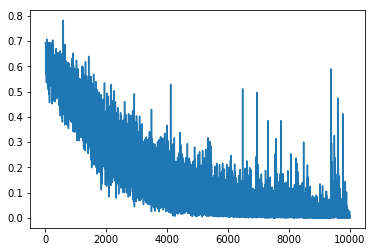

In [128]:
plt.plot(loss_history)

In [194]:
sa, sb = random.choices(contexts_dataset, k=2)

embs = s_emb.embed([sa, sb])

print('A:', sa)
print('B:', sb)

print(s_emb.query(embs[0], sa).cpu().tolist())
print(s_emb.query(embs[0], sb).round().cpu().tolist())

print(s_emb.query(embs[1], sa).cpu().tolist())
print(s_emb.query(embs[1], sb).round().cpu().tolist())

A: ['if', 'id', 'is', 'None', 'project', 'None', 'error', 'Invalid', 'URL', 'else']
B: ['itemsize', 'channel1', 'width1', 'tesseract', 'SetCvImage', 'iplimage', 'api', 'text', 'api', 'GetUTF8Text']
[0.999993085861206, 0.9999868869781494, 0.9998781681060791, 0.999984622001648, 0.9783746600151062, 0.999984622001648, 0.9993973970413208, 0.9997410178184509, 0.9993201494216919, 0.9999406337738037]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
[0.9999258518218994, 0.9988717436790466, 0.9996156692504883, 0.9959056377410889, 0.9774314761161804, 0.9959056377410889, 0.961309552192688, 0.01786724664270878, 0.9066974520683289, 0.998838484287262]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
